In [1]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 7.7 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=76f458a5ab89ba147c9b3d3d6fc53dd0aa3bfdfb3f64badf66198240b6e4a9d7
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap

In [5]:
data = tf.keras.datasets.mnist

# Extract: training_images & training_labels are NumPy arrays
(train_features, training_labels), (test_features, test_labels) = data.load_data()

print(train_features.shape)
print(test_features.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


LABEL: 0

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   3  38  78 146 146 188 255 152   7   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  26 133 253 253 214 177 177 250 253 151   2   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   4 136 253 178  55  16   0   0  42 217 253  54   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  39 173 

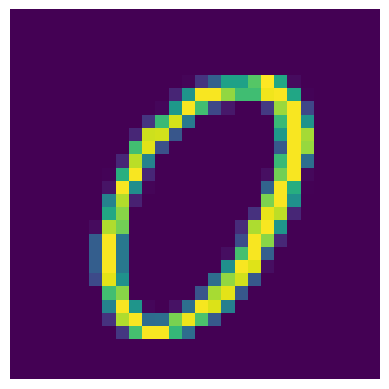

In [6]:
# Show
index = 545

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

print(f'LABEL: {test_labels[index]}') # as numbers
print(f'\nIMAGE PIXEL ARRAY:\n {test_features[index]}') # image
plt.grid(False)
plt.axis('off')
plt.set_cmap('viridis')
plt.imshow(test_features[index])

In [7]:
features = test_features.reshape(test_features.shape[0], -1)

print(features.shape) # flatting

(10000, 784)


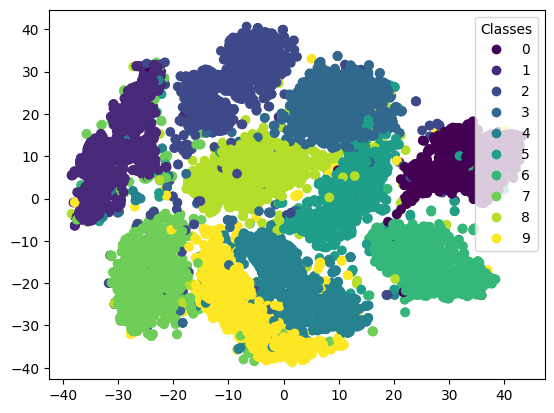

In [10]:
tsne = TSNE(n_components=2,
        n_iter=500,
        n_iter_without_progress=150,
        n_jobs=2,
        random_state=0)

features_tsne = tsne.fit_transform(features)

_, ax = plt.subplots()
scatter = ax.scatter(features_tsne[:, 0], features_tsne[:, 1], c=test_labels)
_ = ax.legend(
    scatter.legend_elements()[0], list(range(10)), loc="upper right", title="Classes"
)

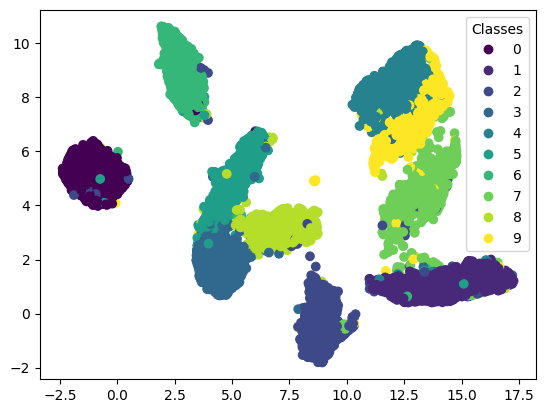

In [13]:
reducer = umap.UMAP(n_components=2)
features_umap = reducer.fit_transform(features)

_, ax = plt.subplots()
scatter = ax.scatter(features_umap[:, 0], features_umap[:, 1], c=test_labels)
_ = ax.legend(
    scatter.legend_elements()[0], list(range(10)), loc="upper right", title="Classes"
)